In [8]:
import pandas as pd 
import numpy as np 
import requests
from tiingo import TiingoClient
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import pearsonr
from datetime import datetime

In [9]:
#Convert spread column to numeric values
treasury_spread = pd.read_csv('T10Y3M.csv')
treasury_spread = treasury_spread.rename(columns={"DATE": "date"})
treasury_spread['T10Y3M'] = treasury_spread['T10Y3M'].apply(pd.to_numeric, downcast='float', errors='coerce')
treasury_spread['chng_T10Y3M'] = treasury_spread['T10Y3M'].diff()
datestring = '00:00:00+00:00'
treasury_spread['date'] = treasury_spread['date'] + ' ' + datestring
treasury_spread['date'] = pd.to_datetime(treasury_spread['date'], format='%Y-%m-%d %H:%M:%S%z')
treasury_spread = treasury_spread.set_index('date')
treasury_spread.head(10)

,T10Y3M,chng_T10Y3M
date,,
2000-06-02 00:00:00+00:00,0.28,NaN
2000-06-05 00:00:00+00:00,0.14,-0.14
2000-06-06 00:00:00+00:00,0.15,0.01
2000-06-07 00:00:00+00:00,0.21,0.06
2000-06-08 00:00:00+00:00,0.22,0.01
2000-06-09 00:00:00+00:00,0.21,-0.01
2000-06-12 00:00:00+00:00,0.16,-0.05
2000-06-13 00:00:00+00:00,0.23,0.07
2000-06-14 00:00:00+00:00,0.24,0.01


In [10]:
#Install the client 
config = {}

config['session'] = True
config['api_key'] = "e0de468256b641ca8f263c206d75b19ecfa27efb"
client = TiingoClient(config)

In [11]:
#Importing the ETFs 
spy_etf = client.get_dataframe('SPY',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')
iwm_etf = client.get_dataframe('IWM',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')

In [12]:
#Specifying ETF column names
spy_etf = spy_etf.add_prefix('spy_')
iwm_etf = iwm_etf.add_prefix('iwm_')


In [13]:
spy_etf.head()

,spy_close,spy_high,spy_low,spy_open,spy_volume,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,spy_adjVolume,spy_divCash,spy_splitFactor
date,,,,,,,,,,,,
2000-06-02 00:00:00+00:00,147.843704,149.093704,147.484299,148.937500,8962200,95.596796,96.405055,95.364402,96.304053,8962200,0.0,1.0
2000-06-05 00:00:00+00:00,147.125000,148.218704,146.875000,147.468704,6998100,95.132077,95.839274,94.970425,95.354319,6998100,0.0,1.0
2000-06-06 00:00:00+00:00,146.468704,147.781204,145.906204,146.625000,4858900,94.707711,95.556383,94.343995,94.808773,4858900,0.0,1.0
2000-06-07 00:00:00+00:00,147.484299,148.000000,146.000000,146.625000,4919500,95.364402,95.697858,94.404644,94.808773,4919500,0.0,1.0
2000-06-08 00:00:00+00:00,146.906204,147.750000,146.062500,147.500000,5723100,94.990602,95.536207,94.445057,95.374555,5723100,0.0,1.0


In [14]:
iwm_etf.head()

,iwm_close,iwm_high,iwm_low,iwm_open,iwm_volume,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,iwm_adjVolume,iwm_divCash,iwm_splitFactor
date,,,,,,,,,,,,
2000-06-02 00:00:00+00:00,102.4,102.4,101.7,101.7,14700,37.544774,37.544774,37.288120,37.288120,29400,0.0,1.0
2000-06-05 00:00:00+00:00,102.0,103.1,101.9,102.1,24200,37.398115,37.801428,37.361450,37.434780,48400,0.0,1.0
2000-06-06 00:00:00+00:00,103.0,104.8,102.7,103.6,75900,37.764763,38.424730,37.654769,37.984752,151800,0.0,1.0
2000-06-07 00:00:00+00:00,103.1,103.1,101.4,102.4,65500,37.801428,37.801428,37.178126,37.544774,131000,0.0,1.0
2000-06-08 00:00:00+00:00,102.9,104.3,102.9,104.3,45700,37.728098,38.241406,37.728098,38.241406,91400,0.0,1.0


In [15]:
#Combining dataframes
spy_iwm_pair = pd.concat([spy_etf, iwm_etf], axis=1)
spy_iwm_pair = pd.merge(spy_iwm_pair, treasury_spread, left_index=True, right_index=True, how='left')
spy_iwm_pair.index = spy_iwm_pair.index.tz_convert(None)
spy_iwm_pair.head()

,spy_close,spy_high,spy_low,spy_open,spy_volume,spy_adjClose,spy_adjHigh,spy_adjLow,spy_adjOpen,spy_adjVolume,...,iwm_volume,iwm_adjClose,iwm_adjHigh,iwm_adjLow,iwm_adjOpen,iwm_adjVolume,iwm_divCash,iwm_splitFactor,T10Y3M,chng_T10Y3M
date,,,,,,,,,,,,,,,,,,,,,
2000-06-02,147.843704,149.093704,147.484299,148.937500,8962200,95.596796,96.405055,95.364402,96.304053,8962200,...,14700,37.544774,37.544774,37.288120,37.288120,29400,0.0,1.0,0.28,NaN
2000-06-05,147.125000,148.218704,146.875000,147.468704,6998100,95.132077,95.839274,94.970425,95.354319,6998100,...,24200,37.398115,37.801428,37.361450,37.434780,48400,0.0,1.0,0.14,-0.14
2000-06-06,146.468704,147.781204,145.906204,146.625000,4858900,94.707711,95.556383,94.343995,94.808773,4858900,...,75900,37.764763,38.424730,37.654769,37.984752,151800,0.0,1.0,0.15,0.01
2000-06-07,147.484299,148.000000,146.000000,146.625000,4919500,95.364402,95.697858,94.404644,94.808773,4919500,...,65500,37.801428,37.801428,37.178126,37.544774,131000,0.0,1.0,0.21,0.06
2000-06-08,146.906204,147.750000,146.062500,147.500000,5723100,94.990602,95.536207,94.445057,95.374555,5723100,...,45700,37.728098,38.241406,37.728098,38.241406,91400,0.0,1.0,0.22,0.01


In [16]:
len(spy_iwm_pair)

5932

In [17]:
#Dropping extraneous columns
def drop_cols(df, str1, str2):
    df = df.drop(columns=[str1+'_close', str1+'_high', str1+'_low', str1+'_open', str1+'_adjHigh', str1+'_adjLow',
                        str1+'_volume', str1+'_divCash', str1+'_splitFactor', str1+'_adjVolume', 
                        str2+'_close', str2+'_high', str2+'_low', str2+'_open', str2+'_adjHigh', str2+'_adjLow',
                        str2+'_volume', str2+'_divCash', str2+'_splitFactor', str2+'_adjVolume'])
    return df
spy_iwm_pair = drop_cols(spy_iwm_pair, 'spy', 'iwm')

In [18]:
#Calculate Returns 
spy_iwm_pair['spy_daily_returns'] = ((spy_iwm_pair['spy_adjClose'] - spy_iwm_pair['spy_adjOpen']) / spy_iwm_pair['spy_adjOpen']) * 100
spy_iwm_pair['iwm_daily_returns'] = ((spy_iwm_pair['iwm_adjClose'] - spy_iwm_pair['iwm_adjOpen']) / spy_iwm_pair['iwm_adjOpen']) * 100
spy_iwm_pair['spy_iwm_return_spread'] = spy_iwm_pair['spy_daily_returns'] - spy_iwm_pair['iwm_daily_returns']
spy_iwm_pair

,spy_adjClose,spy_adjOpen,iwm_adjClose,iwm_adjOpen,T10Y3M,chng_T10Y3M,spy_daily_returns,iwm_daily_returns,spy_iwm_return_spread
date,,,,,,,,,
2000-06-02,95.596796,96.304053,37.544774,37.288120,0.28,NaN,-0.734399,0.688299,-1.422698
2000-06-05,95.132077,95.354319,37.398115,37.434780,0.14,-0.14,-0.233069,-0.097943,-0.135126
2000-06-06,94.707711,94.808773,37.764763,37.984752,0.15,0.01,-0.106596,-0.579151,0.472555
2000-06-07,95.364402,94.808773,37.801428,37.544774,0.21,0.06,0.586052,0.683594,-0.097542
2000-06-08,94.990602,95.374555,37.728098,38.241406,0.22,0.01,-0.402574,-1.342282,0.939708
...,...,...,...,...,...,...,...,...,...
2023-12-22,473.650000,473.860000,201.480000,200.880000,-1.54,-0.01,-0.044317,0.298686,-0.343003
2023-12-26,475.650000,474.070000,204.100000,202.210000,-1.56,NaN,0.333284,0.934672,-0.601388
2023-12-27,476.510000,475.440000,204.820000,204.440000,-1.65,-0.09,0.225055,0.185874,0.039181


In [19]:
#Create trailing volatility and future volatility columns
def make_vol(df, etf, days):
    for d in days:
        for i in etf:
            df[i+ '_' + str(d) + '_day_vol_trail'] = np.sqrt(np.log(spy_iwm_pair[i+'_adjClose']).diff().rolling(d).var()*252)
            df[i+ '_' + str(d) + '_day_vol_future'] = df[i+ '_' + str(d) + '_day_vol_trail'].shift(-d)         
            
    return df

etfs = ['spy', 'iwm']
days = [i for i in range(30, 150, 30)]
spy_iwm_pair = make_vol(spy_iwm_pair, etfs, days)
spy_iwm_pair = spy_iwm_pair.fillna(method='ffill')
spy_iwm_pair = spy_iwm_pair.drop(spy_iwm_pair.filter(regex='trail').columns, axis=1)
spy_iwm_pair

,spy_adjClose,spy_adjOpen,iwm_adjClose,iwm_adjOpen,T10Y3M,chng_T10Y3M,spy_daily_returns,iwm_daily_returns,spy_iwm_return_spread,spy_30_day_vol_future,iwm_30_day_vol_future,spy_60_day_vol_future,iwm_60_day_vol_future,spy_90_day_vol_future,iwm_90_day_vol_future,spy_120_day_vol_future,iwm_120_day_vol_future
date,,,,,,,,,,,,,,,,,
2000-06-02,95.596796,96.304053,37.544774,37.288120,0.28,NaN,-0.734399,0.688299,-1.422698,0.147685,0.217855,0.141855,0.213708,0.151440,0.213516,0.182557,0.236245
2000-06-05,95.132077,95.354319,37.398115,37.434780,0.14,-0.14,-0.233069,-0.097943,-0.135126,0.149105,0.224632,0.141418,0.214290,0.151832,0.213495,0.185612,0.238064
2000-06-06,94.707711,94.808773,37.764763,37.984752,0.15,0.01,-0.106596,-0.579151,0.472555,0.150539,0.229534,0.142589,0.213459,0.157159,0.218537,0.188033,0.241177
2000-06-07,95.364402,94.808773,37.801428,37.544774,0.21,0.06,0.586052,0.683594,-0.097542,0.154335,0.233760,0.144378,0.214389,0.166536,0.228155,0.188211,0.241218
2000-06-08,94.990602,95.374555,37.728098,38.241406,0.22,0.01,-0.402574,-1.342282,0.939708,0.164918,0.248073,0.144074,0.214881,0.166677,0.228602,0.189713,0.245049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,473.650000,473.860000,201.480000,200.880000,-1.54,-0.01,-0.044317,0.298686,-0.343003,0.081321,0.210428,0.119043,0.234298,0.123028,0.213986,0.117304,0.196754
2023-12-26,475.650000,474.070000,204.100000,202.210000,-1.56,-0.01,0.333284,0.934672,-0.601388,0.081321,0.210428,0.119043,0.234298,0.123028,0.213986,0.117304,0.196754
2023-12-27,476.510000,475.440000,204.820000,204.440000,-1.65,-0.09,0.225055,0.185874,0.039181,0.081321,0.210428,0.119043,0.234298,0.123028,0.213986,0.117304,0.196754


In [20]:
#Split dataframes from 2000-2012 to 2012-current
split_date = pd.to_datetime('2012-01-01')
spy_iwm_pair_2000_2012 = spy_iwm_pair.loc[spy_iwm_pair.index <= split_date]
spy_iwm_pair_2012_2023 = spy_iwm_pair.loc[spy_iwm_pair.index > split_date]

In [21]:
def make_scatter_ret(df, days_shift, spread_col, return_col):
    fig, axes = plt.subplots(1, len(days_shift), figsize=(20, 3))
    
    if df.index[0] <= split_date:
        df = df.iloc[1:, :]
    
    for i, day in enumerate(days_shift, start=1):
        
        df_spread = df[spread_col][::day]
        df_return_or_vol = df[return_col][::day]
        
        slope, intercept = np.polyfit(df_spread, df_return_or_vol, 1)
        corr = pearsonr(df_spread, df_return_or_vol)
        first_index, last_index = df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d')
        
        ax = axes[i-1]
        ax.scatter(df_spread, df_return_or_vol, color='blue', alpha=0.5)
        ax.plot(df_spread, slope * df_spread + intercept, color='red', label='Regression line')
        ax.set_title(f'{first_index} to {last_index}, pearson coeffiecient {corr[0]:.4f}', pad=10, fontsize=10) 
        ax.set_xlabel(spread_col, fontsize= 10)
        ax.set_ylabel(f'{return_col[:3]}_{day}_day_future_returns', fontsize= 10)
        ax.tick_params(axis= 'both', which= 'major', labelsize=8)
    
    plt.show()

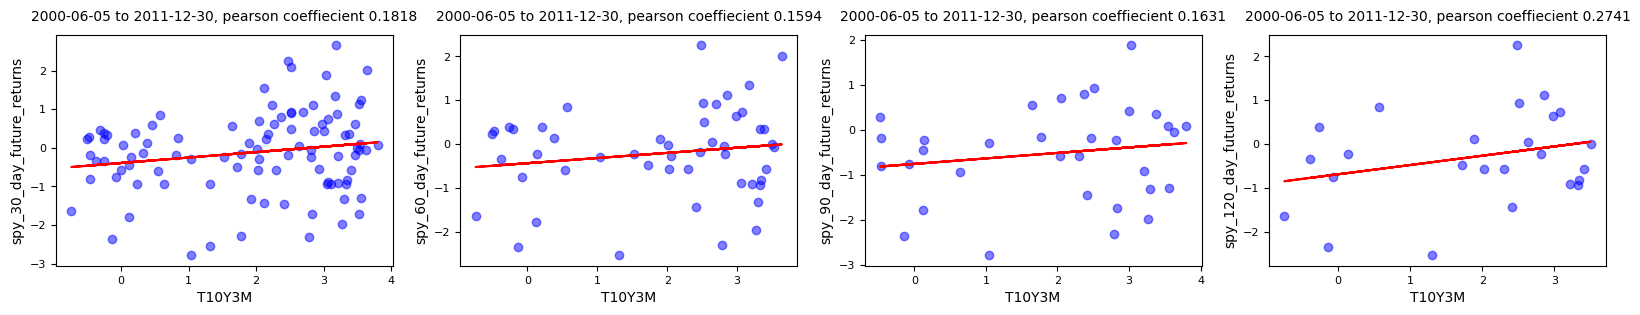

In [22]:
make_scatter_ret(spy_iwm_pair_2000_2012, days, 'T10Y3M', 'spy_daily_returns')

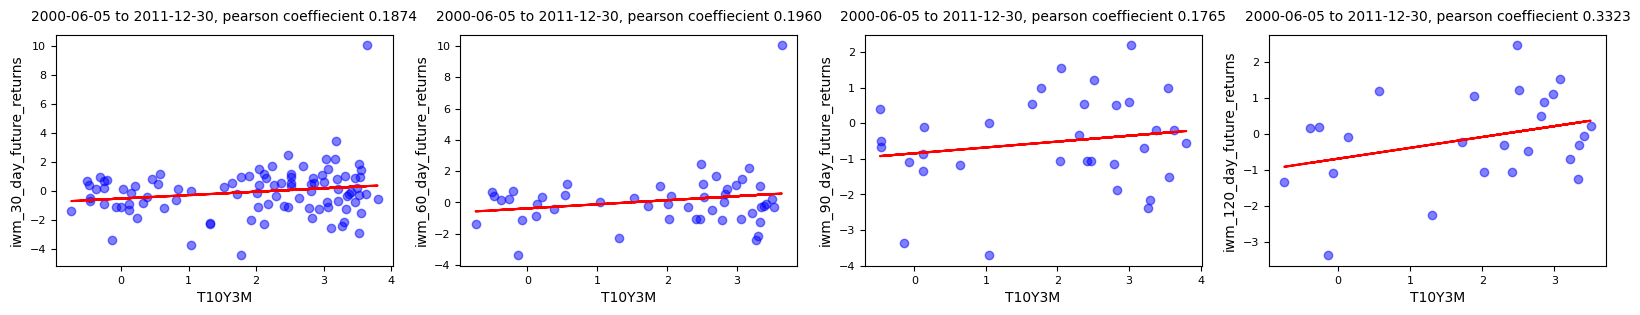

In [23]:
make_scatter_ret(spy_iwm_pair_2000_2012, days, 'T10Y3M', 'iwm_daily_returns')

The results above show that there might be some correlation between 90 day future returns for both SPY and IWM from 2000 to 2012

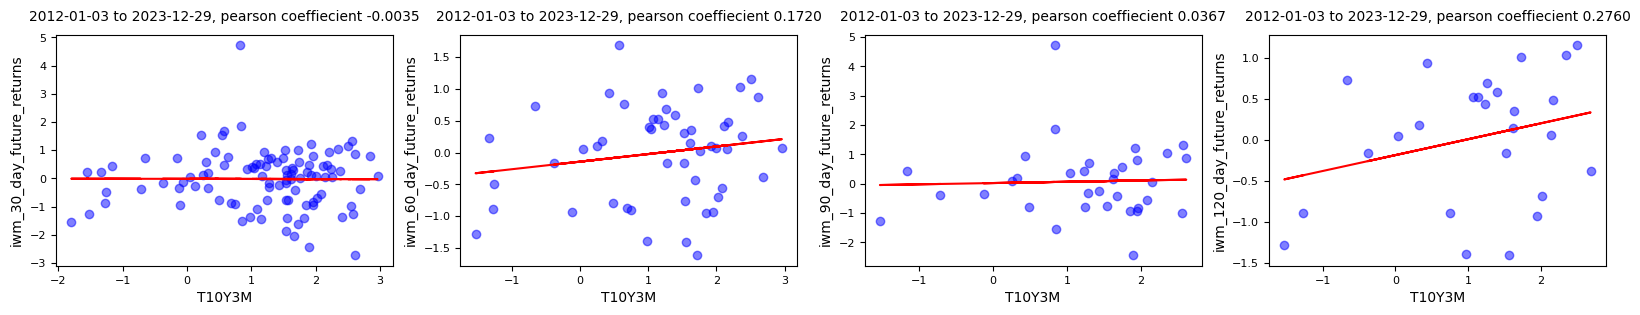

In [24]:
make_scatter_ret(spy_iwm_pair_2012_2023, days, 'T10Y3M', 'iwm_daily_returns')

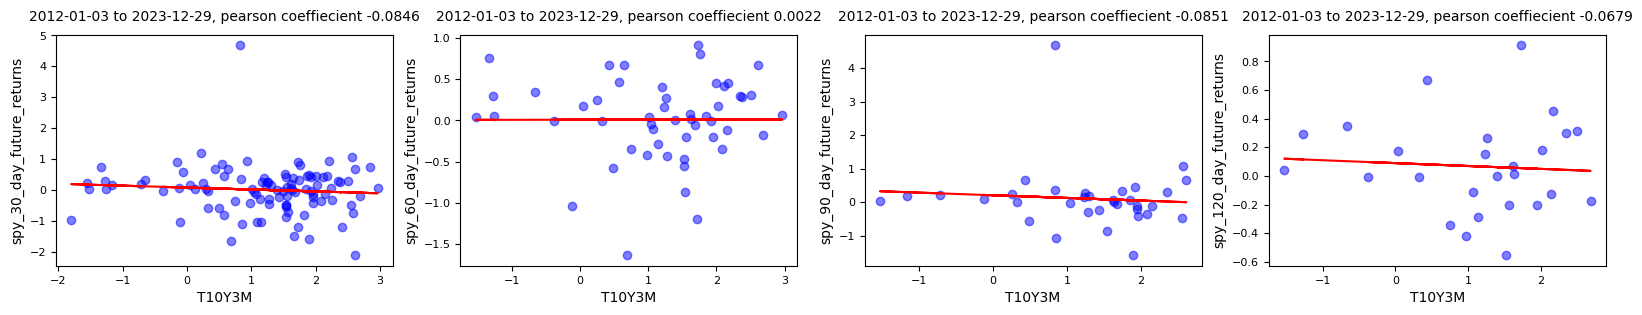

In [25]:
make_scatter_ret(spy_iwm_pair_2012_2023, days, 'T10Y3M', 'spy_daily_returns')

This trend seems to change as we look back at the 2012 period to current where the spread seems to have more correlation to IWM's returns on the 60 day and 120 day level 

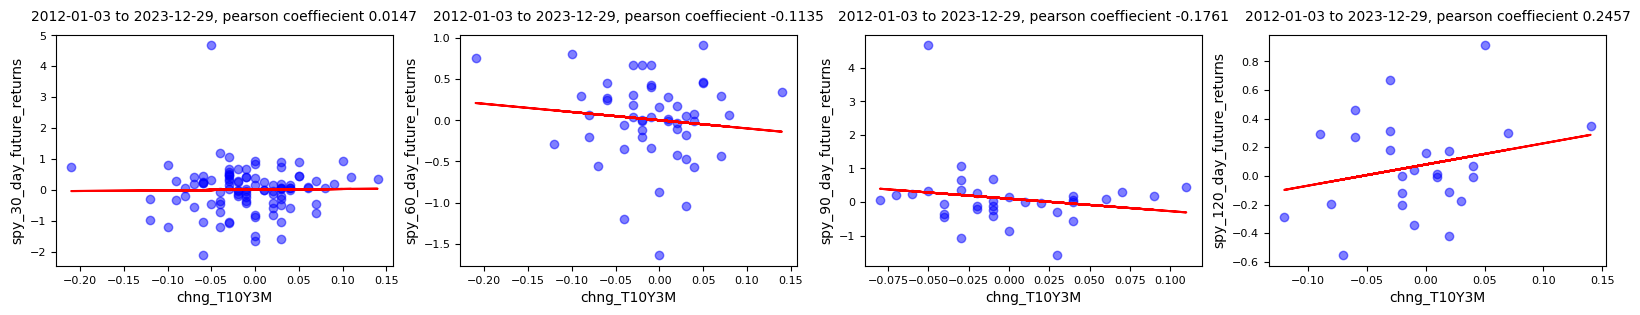

In [26]:
make_scatter_ret(spy_iwm_pair_2012_2023, days, 'chng_T10Y3M', 'spy_daily_returns')

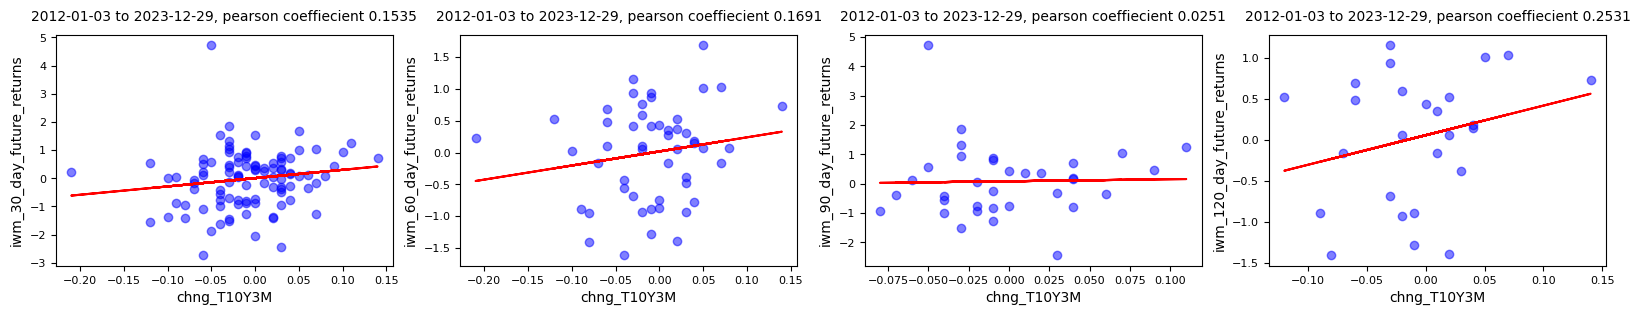

In [27]:
make_scatter_ret(spy_iwm_pair_2012_2023, days, 'chng_T10Y3M', 'iwm_daily_returns')

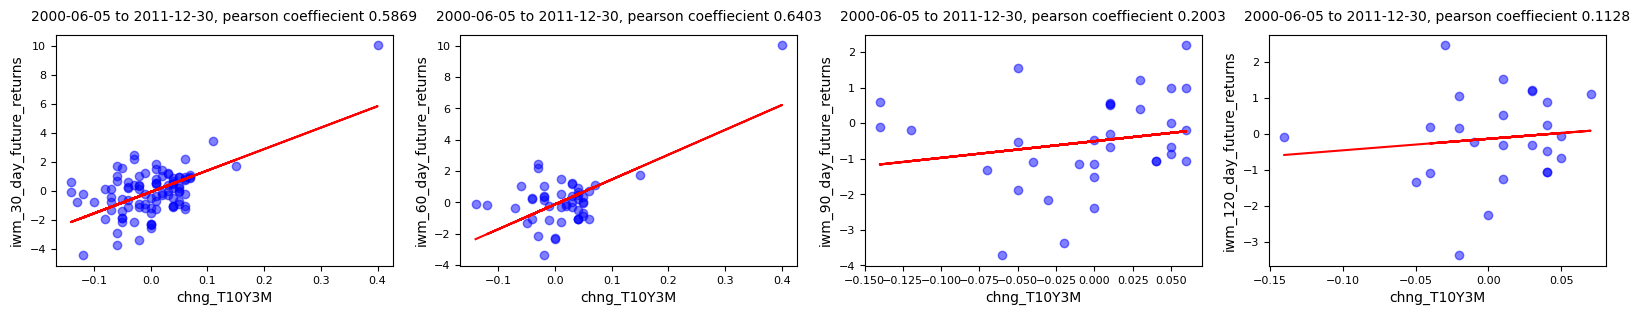

In [28]:
make_scatter_ret(spy_iwm_pair_2000_2012, days, 'chng_T10Y3M', 'iwm_daily_returns')

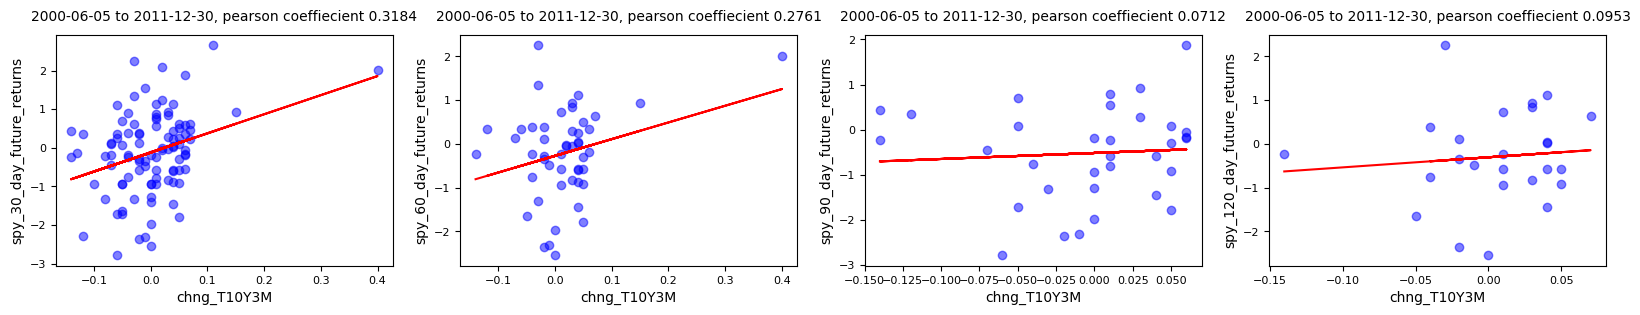

In [29]:
make_scatter_ret(spy_iwm_pair_2000_2012, days, 'chng_T10Y3M', 'spy_daily_returns')

Using the change in yield as the y variable seems to have changed over time as we look at the change in the yield spread are we looking there seems to be stronger correlation in the change in yield spread in 2000-2012 compared in 2012-2023. 

In [69]:
def make_scatter_vol(df, spread_col):
    fig, axes = plt.subplots(2, 4, figsize=(30, 10))
              
    if df.index[0] <= split_date:
        df = df.iloc[1:, :]
    
    df_spread = df[[spread_col]]
    
    df = df[['spy_30_day_vol_future', 'iwm_30_day_vol_future',
             'spy_60_day_vol_future', 'iwm_60_day_vol_future', 'spy_90_day_vol_future',	
             'iwm_90_day_vol_future', 'spy_120_day_vol_future',	'iwm_120_day_vol_future']]
    
    for i, column in enumerate(df.columns):
        
        number = int(column.split('_')[1]) if column.split('_')[1].isdigit() else 1
        
        df_spread_slice = df_spread[::number]
        df_return_or_vol = df[column][::number]
        
        slope, intercept = np.polyfit(df_spread_slice.squeeze(), df_return_or_vol, 1)
        corr = pearsonr(df_spread_slice.squeeze(), df_return_or_vol)
        first_index, last_index = df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d')
        
        ax = axes[i // 4, i % 4] 
        ax.scatter(df_spread_slice, df_return_or_vol, color='blue', alpha=0.5)
        ax.plot(df_spread_slice, slope * df_spread_slice + intercept, color='red', label='Regression line')
        ax.set_title(f'{first_index} to {last_index}, pearson coeffiecient {corr[0]:.4f}', pad=15, fontsize= 15) 
        ax.set_xlabel(spread_col, fontsize= 15)
        ax.set_ylabel(f'{column[:3]}_{number}_day_future_volatiliy', fontsize= 15)
        ax.tick_params(axis= 'both', which= 'major', labelsize=15)
    
    plt.tight_layout()  
    plt.show()


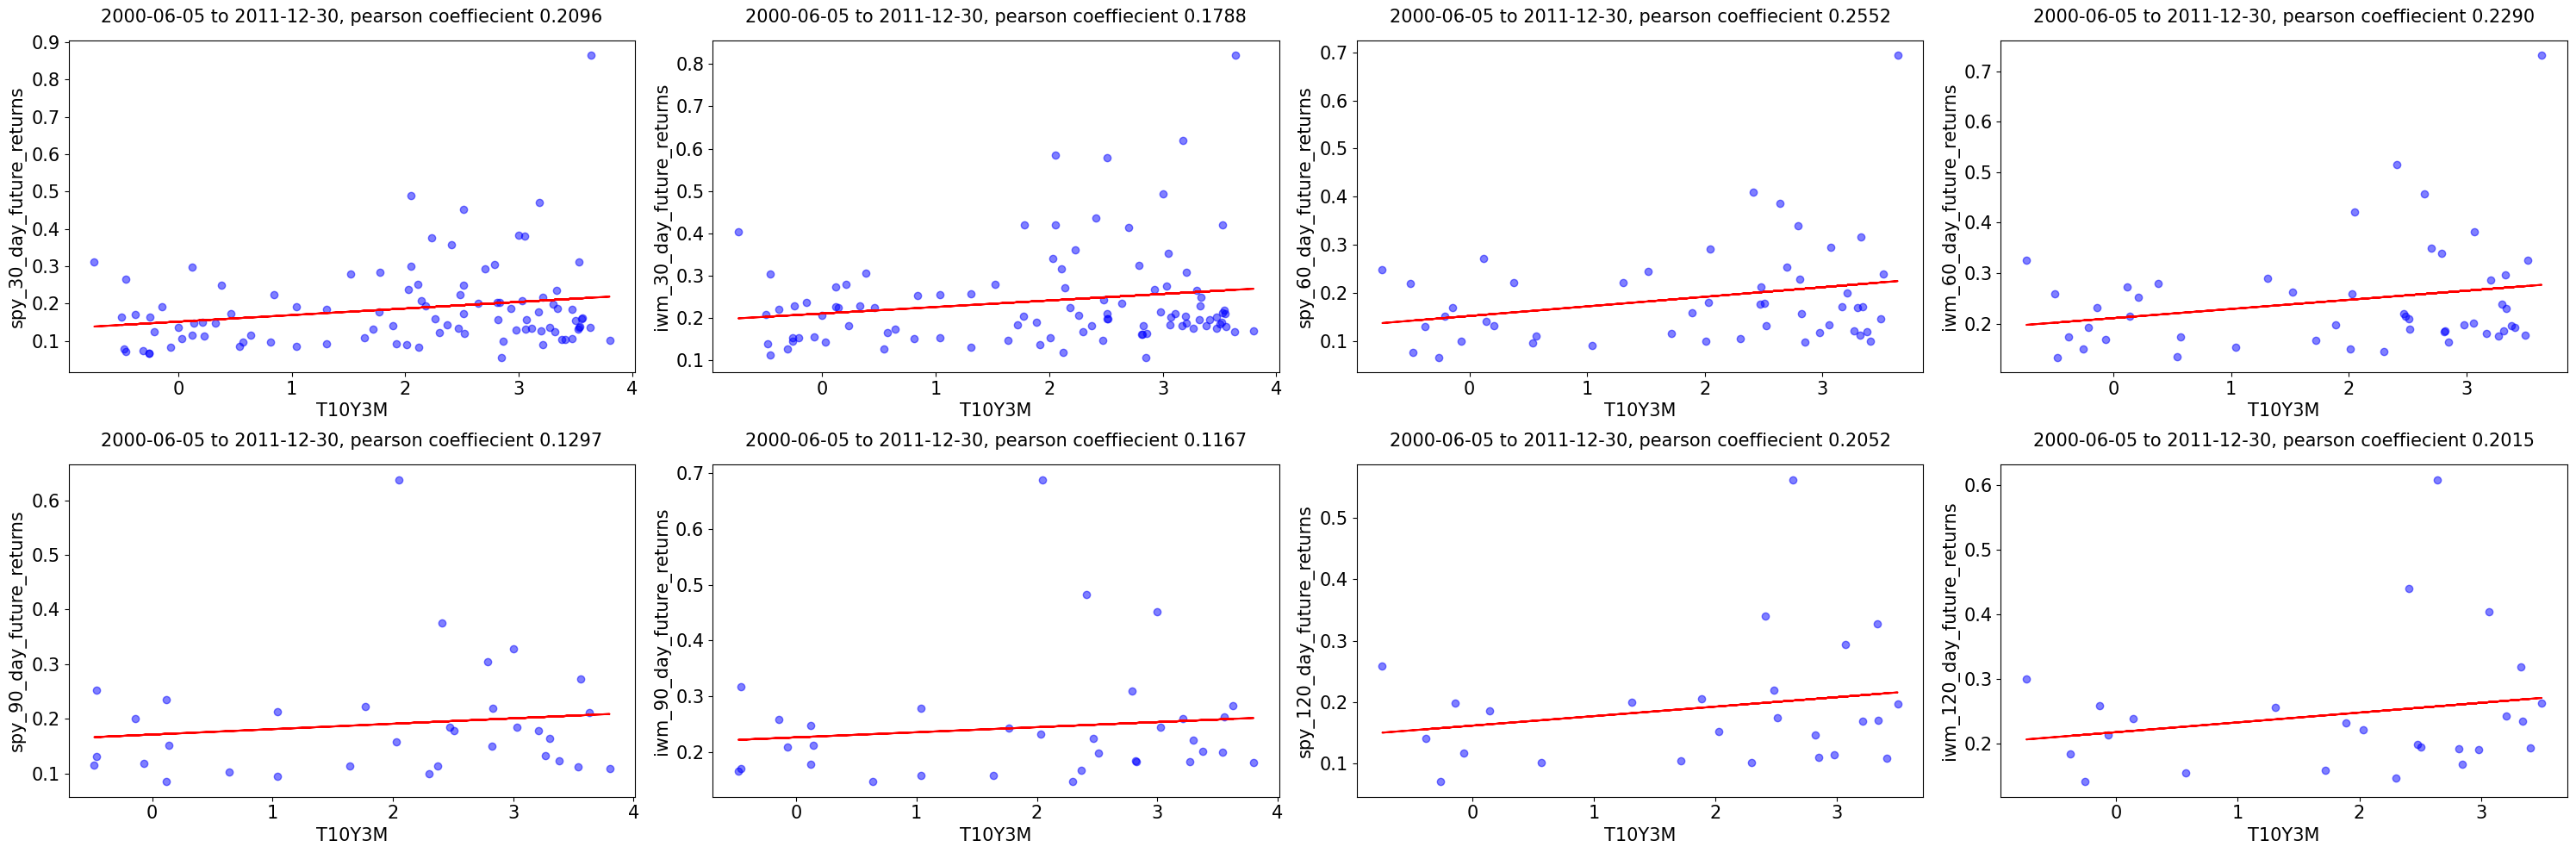

In [70]:
make_scatter_vol(spy_iwm_pair_2000_2012, 'T10Y3M')

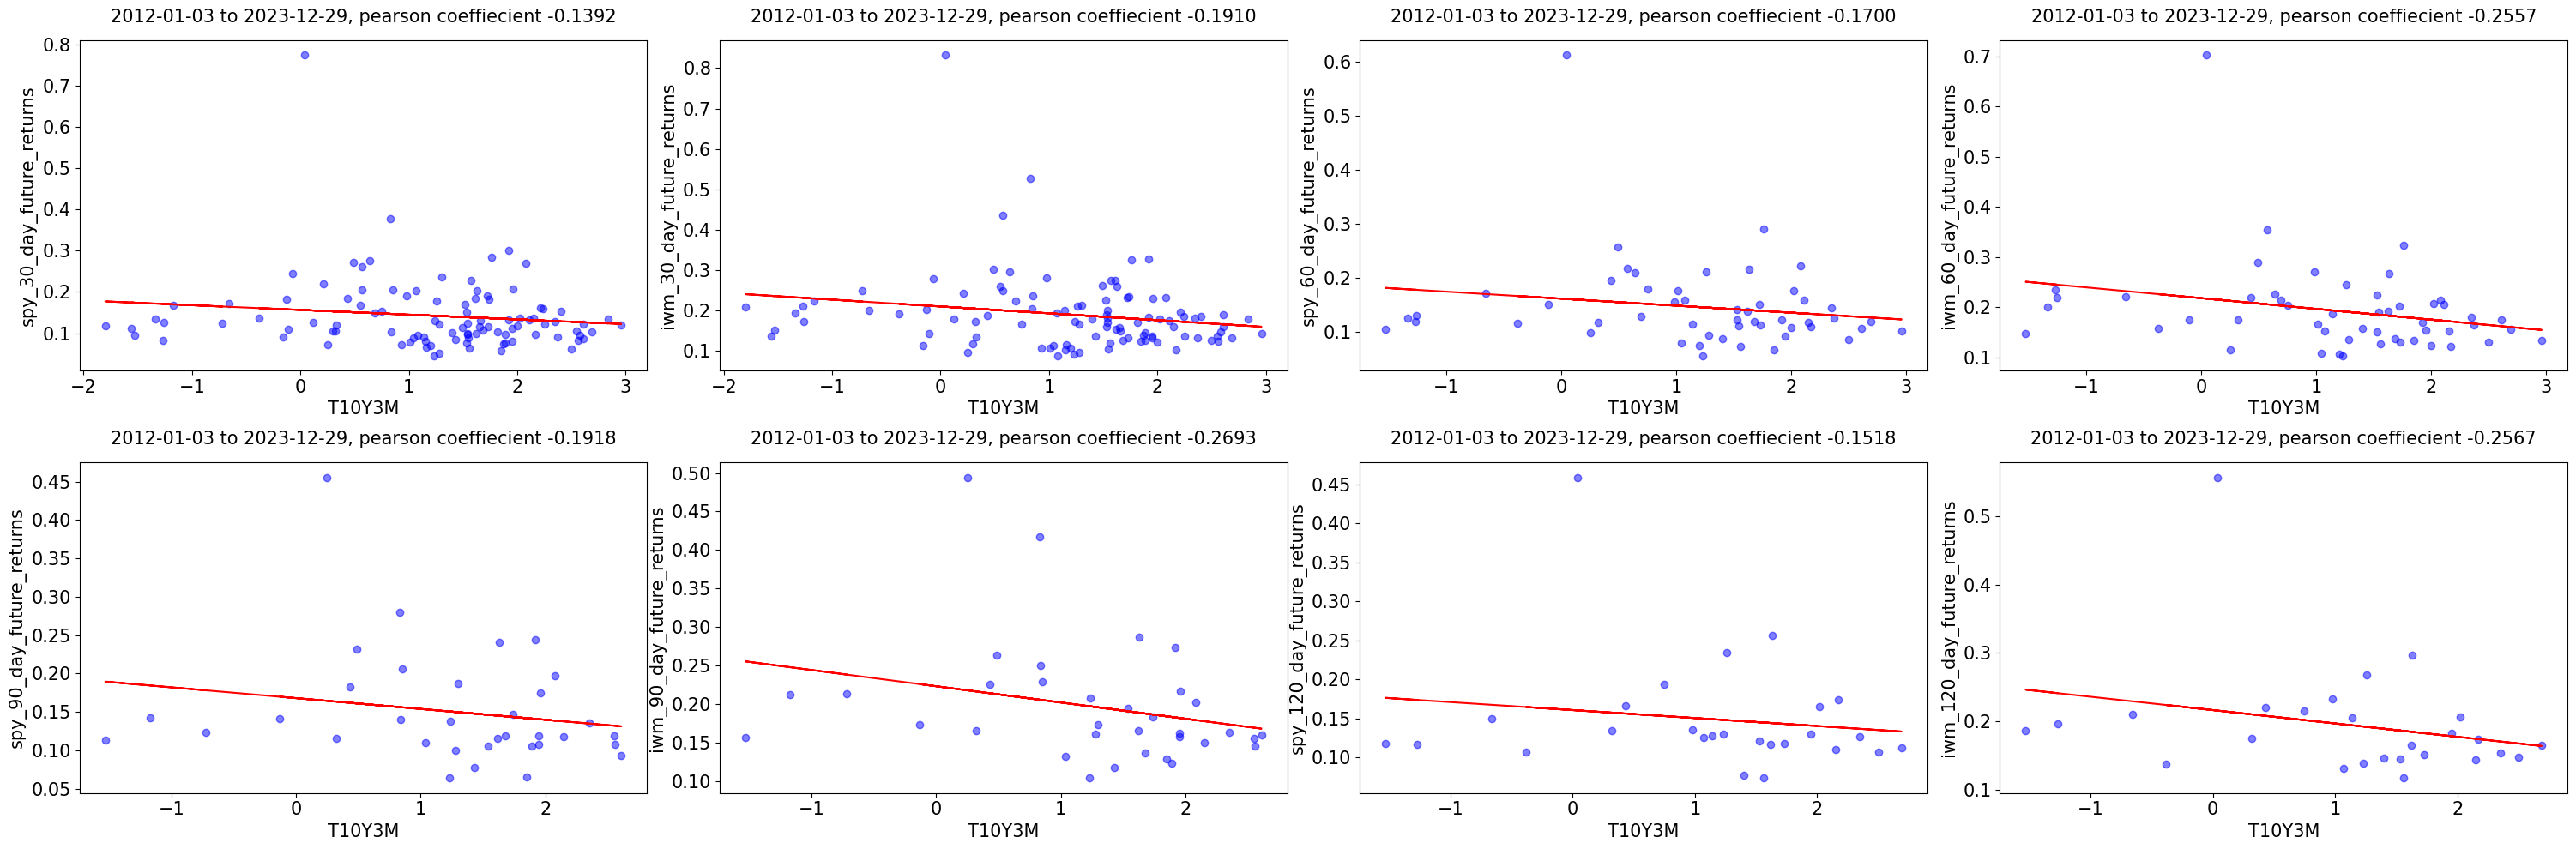

In [71]:
make_scatter_vol(spy_iwm_pair_2012_2023, 'T10Y3M')

Seems like the 90 day future volataility has the strongest correlation to the yield spread but from 2012 and onward we can see a negative correlarion between future volatility and the yield spread whilist the opposite from 2000 to 2012

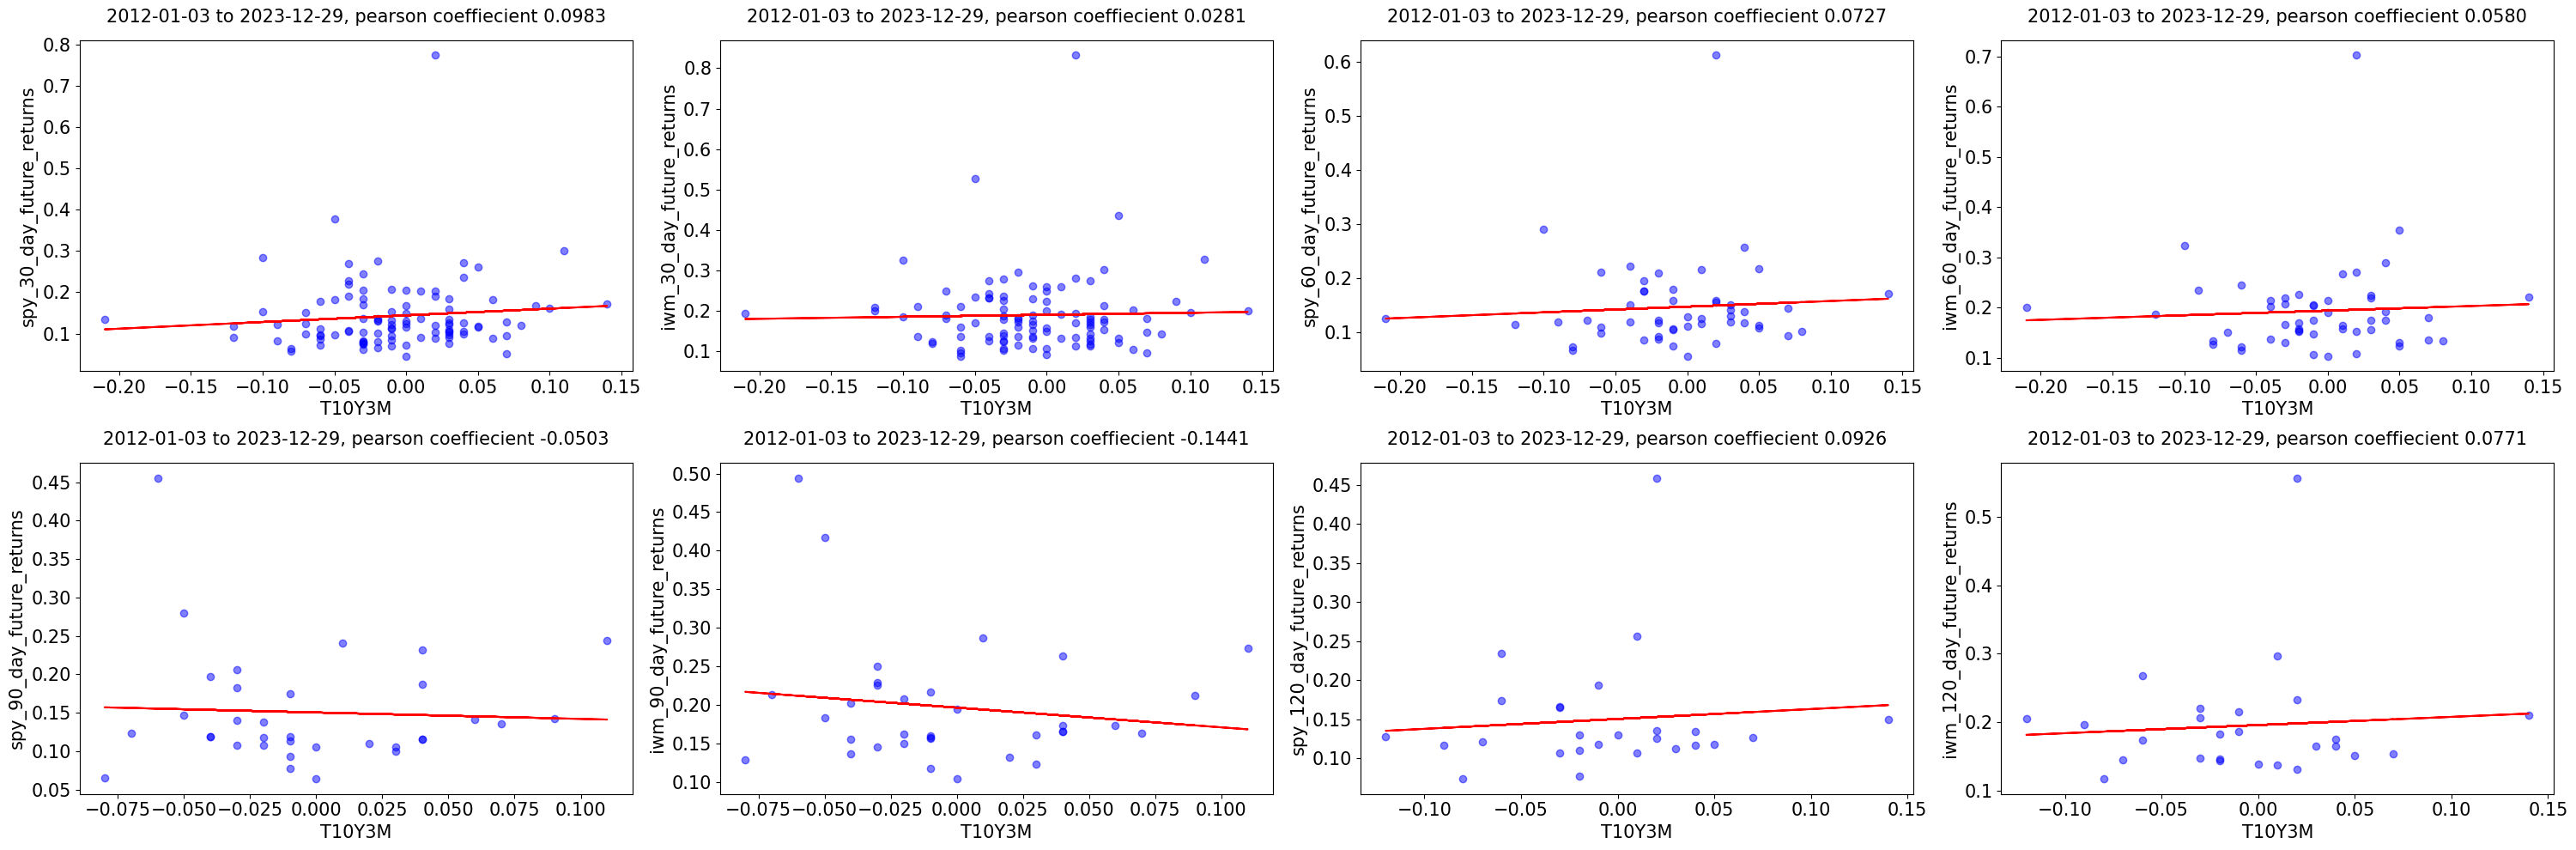

In [72]:
make_scatter_vol(spy_iwm_pair_2012_2023, 'chng_T10Y3M')

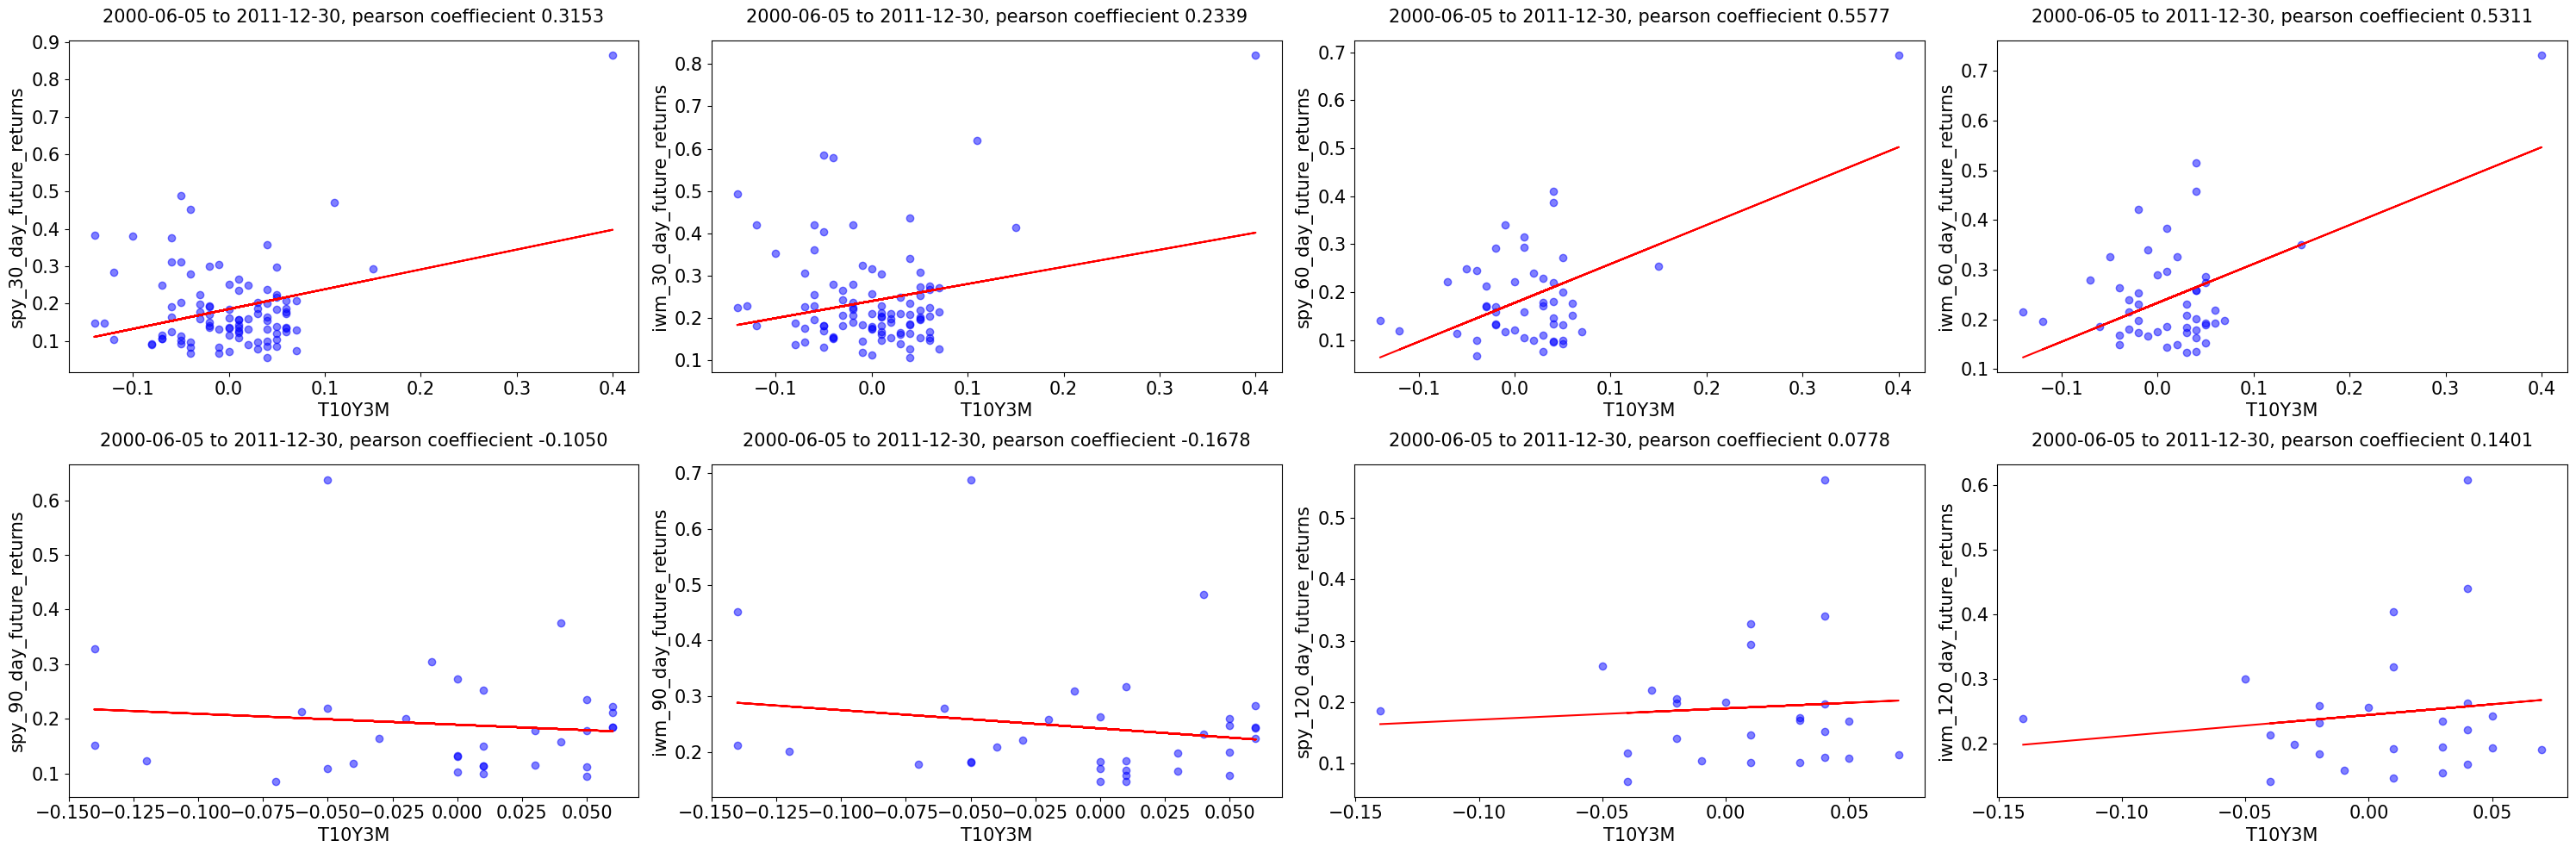

In [73]:
make_scatter_vol(spy_iwm_pair_2000_2012, 'chng_T10Y3M')

With our strongest results yet we have found that the change in the yield spread has the highest correlation in the 60 future volatility 